In [1]:
! kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
! mv kaggle.json /root/.kaggle/kaggle.json

In [8]:
! kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: too few arguments


In [9]:
! chmod 600 /root/.kaggle/kaggle.json

In [10]:
! kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: too few arguments


In [11]:
! kaggle datasets download ellenyusa/4classimages

 88% 34.0M/38.5M [00:00<00:00, 29.2MB/s]
100% 38.5M/38.5M [00:00<00:00, 60.7MB/s]


In [12]:
! unzip -qq 4classimages.zip

In [13]:
! rm -rf ./data/data

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
generator = ImageDataGenerator()

In [17]:
flow = generator.flow_from_directory("./data")

Found 808 images belonging to 4 classes.


In [19]:
flow.num_classes

4

In [22]:
X, y = flow.next()

In [40]:
X.shape

(32, 256, 256, 3)

In [31]:
import matplotlib.pyplot as plt
import numpy as np

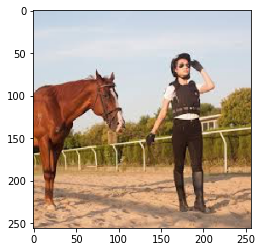

In [32]:
plt.imshow(X[21].astype(np.uint8))

In [33]:
from tensorflow.keras.applications import ResNet50

In [41]:
res = ResNet50(include_top=False, weights='imagenet', pooling='max', input_shape=[256, 256, 3])

In [45]:
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [46]:
for layer in res.layers:
  layer.trainable = False

In [47]:
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense
from tensorflow.keras.losses import categorical_crossentropy

In [50]:
d1 = Dense(400, activation="tanh")(res.output)
d2 = Dense(100, activation="tanh")(d1)
d3 = Dense(50, activation="tanh")(d2)
out = Dense(4, activation="softmax")(d2)

In [51]:
model = Model(res.input, out)

In [52]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [54]:
model.fit_generator(flow, steps_per_epoch=20, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 38s 292ms/step - loss: 0.6526 - accuracy: 0.7760
Epoch 2/10
20/20 [==============================] - 5s 260ms/step - loss: 0.2125 - accuracy: 0.9432
Epoch 3/10
20/20 [==============================] - 5s 260ms/step - loss: 0.1374 - accuracy: 0.9659
Epoch 4/10
20/20 [==============================] - 5s 262ms/step - loss: 0.1527 - accuracy: 0.9497
Epoch 5/10
20/20 [==============================] - 5s 261ms/step - loss: 0.1056 - accuracy: 0.9724
Epoch 6/10
20/20 [==============================] - 5s 262ms/step - loss: 0.0752 - accuracy: 0.9903
Epoch 7/10
20/20 [==============================] - 5s 269ms/step - loss: 0.0635 - accuracy: 0.9859
Epoch 8/10
20/20 [==============================] - 5s 265ms/step - loss: 0.0895 - accuracy: 0.9740
Epoch 9/10
20/20 [==============================] - 6s 270ms/step - loss: 0.0989 - accuracy: 0.9719
Epoch 10/10
20/20 [==============================] - 5s 271ms/step - loss: 0.0672 - accuracy: 0.982

In [97]:
url = r"https://avatars.githubusercontent.com/u/25343183?v=4"

In [98]:
import requests
from tensorflow.keras.preprocessing.image import load_img

In [99]:
response = requests.get(url)
with open("image.jpeg", "wb") as f:
  f.write(response.content)

In [109]:
img = load_img("cat.jpg", target_size=(256, 256))

FileNotFoundError: ignored

In [101]:
imgarr = np.array(img)

In [102]:
imgarr.shape

(256, 256, 3)

In [103]:
out = model.predict(np.array([imgarr]))

In [104]:
np.argmax(out, axis=1)

array([0])

In [105]:
flow.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}

In [108]:
model.save("animals.h5", save_format="h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
